In [8]:
import networkx as nx
import numpy as np

In [4]:
# Create a function to generate a m times n grid of nodes which are connected to their neighbors
# in the grid. The function should return the graph object. Each edge should have a weight of 1.
def create_grid(m, n):
    G = nx.Graph()
    for i in range(m):
        for j in range(n):
            if i > 0:
                G.add_edge((i, j), (i-1, j), weight=1)
            if j > 0:
                G.add_edge((i, j), (i, j-1), weight=1)
    return G

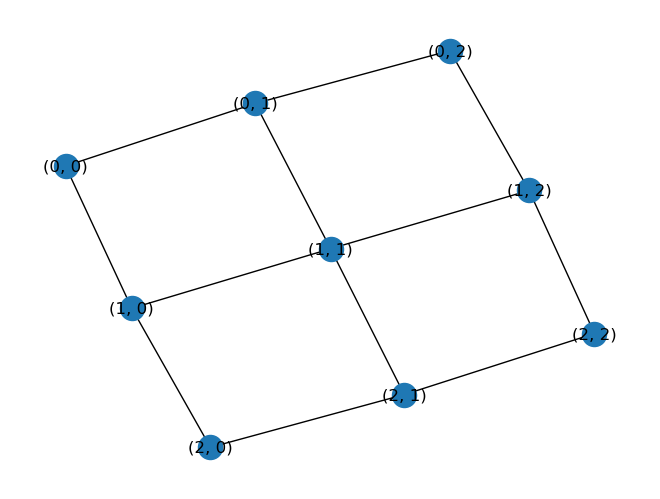

In [6]:
G = create_grid(3, 3)
nx.draw(G, with_labels=True)

In [ ]:
def generate_OD_flows(G, num_flows):
    flows = []
    for i in range(num_flows):
        nodes = list(G.nodes)
        origin = np.random.choice(nodes)
        dest = np.random.choice(nodes)
        while dest == origin:
            dest = np.random.choice(nodes)
        flow = np.random.randint(1, 100)
        flows.append((origin, dest, flow))
    return flows


In [29]:
list(G.nodes)

[(0, 1), (0, 0), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]